#Importando bibliotecas, lendo dataset, pré-processamento:

In [1]:
#Imports
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve,  confusion_matrix


In [2]:
#Lendo dataset
df = pd.read_csv("Qualitative_Bankruptcy.csv", names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness', 'Operating Risk', 'Class'])
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
#Pré-processando
df["Industrial Risk"]=preprocessing.LabelEncoder().fit_transform(df["Industrial Risk"])
df["Management Risk"]=preprocessing.LabelEncoder().fit_transform(df["Management Risk"])
df["Financial Flexibility"]=preprocessing.LabelEncoder().fit_transform(df["Financial Flexibility"])
df["Credibility"]=preprocessing.LabelEncoder().fit_transform(df["Credibility"])
df["Competitiveness"]=preprocessing.LabelEncoder().fit_transform(df["Competitiveness"])
df["Operating Risk"]=preprocessing.LabelEncoder().fit_transform(df["Operating Risk"])
df["Class"]=preprocessing.LabelEncoder().fit_transform(df["Class"])

df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [4]:
true_labels = df['Class']
df = df.drop(['Class'], axis=1)
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


#Clustering com 2-Means, para simular uma classificação binária

In [5]:
kmeans = KMeans(
   init="k-means++",
   n_clusters=2,
   n_init=10,
   max_iter=300,
   random_state=42
   )

kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

#Matriz de confusão e Curva ROC

In [6]:
#Organizando true_labels
true_labels = true_labels.values.T

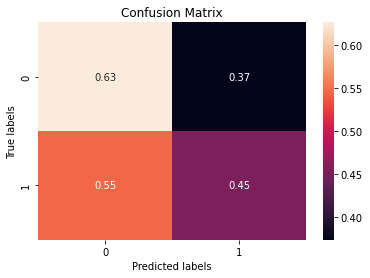

In [7]:
#matriz de confusão
cm = confusion_matrix(true_labels,kmeans.labels_)

#matriz de confusão normalizada
cmn = (cm.T / cm.astype(np.float).sum(axis=1)).T

ax= plt.subplot()
sns.heatmap(cmn, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

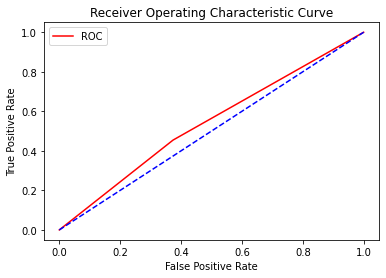

In [8]:
#Curva ROC
fpr,tpr, thresholds = roc_curve(true_labels,kmeans.labels_)

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()